In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math  
from scipy import stats

In [2]:
df_raw = pd.read_csv("C:/Users/Fabrizio Ortega/AppData/Roaming/MetaQuotes/Terminal/Common/Files/EURUSD-PERIOD_M15.csv",
                     sep=',',
                     encoding='utf-16',
                     parse_dates=["Date"])


In [3]:
df_raw.columns,len(df_raw)

(Index(['Date', 'Open', 'High', 'Low', 'Close', 'Ask', 'Bid', 'atr',
        'Momentum10', 'Momentum50', 'Momentum200', 'Macd10_30', 'Macd50_100',
        'Macd100_200', 'Upper_band', 'Lower_band', 'Bulls_power', 'Bears_power',
        'RSI'],
       dtype='object'),
 247399)

In [4]:
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos = max(0,sPos+diff.loc[i])
        sNeg = min(0,sNeg+diff.loc[i])
        if sNeg<-h:
            sNeg=0
            tEvents.append(i)
        elif sPos>h:
            sPos=0
            tEvents.append(i)
    return tEvents

In [5]:
events = getTEvents(df_raw["Close"],0.005)

[10,
 36,
 42,
 60,
 123,
 134,
 158,
 173,
 223,
 228,
 256,
 272,
 316,
 336,
 411,
 440,
 442,
 448,
 453,
 461,
 475,
 507,
 560,
 589,
 604,
 620,
 646,
 698,
 703,
 716,
 750,
 788,
 851,
 885,
 941,
 997,
 1071,
 1081,
 1133,
 1150,
 1172,
 1189,
 1259,
 1282,
 1285,
 1291,
 1309,
 1326,
 1375,
 1386,
 1454,
 1472,
 1521,
 1561,
 1632,
 1654,
 1677,
 1706,
 1730,
 1755,
 1797,
 1829,
 1852,
 1862,
 1925,
 2014,
 2053,
 2115,
 2133,
 2142,
 2206,
 2232,
 2241,
 2264,
 2276,
 2304,
 2318,
 2331,
 2338,
 2352,
 2372,
 2397,
 2412,
 2427,
 2448,
 2480,
 2510,
 2524,
 2526,
 2528,
 2530,
 2576,
 2596,
 2607,
 2616,
 2624,
 2659,
 2696,
 2708,
 2714,
 2720,
 2779,
 2787,
 2802,
 2807,
 2864,
 2954,
 2998,
 3002,
 3075,
 3094,
 3098,
 3129,
 3185,
 3193,
 3203,
 3214,
 3220,
 3274,
 3292,
 3308,
 3351,
 3432,
 3443,
 3451,
 3456,
 3480,
 3548,
 3570,
 3578,
 3609,
 3644,
 3667,
 3675,
 3706,
 3742,
 3762,
 3769,
 3818,
 3828,
 3835,
 3838,
 3853,
 3860,
 3871,
 3904,
 3923,
 3931,
 394

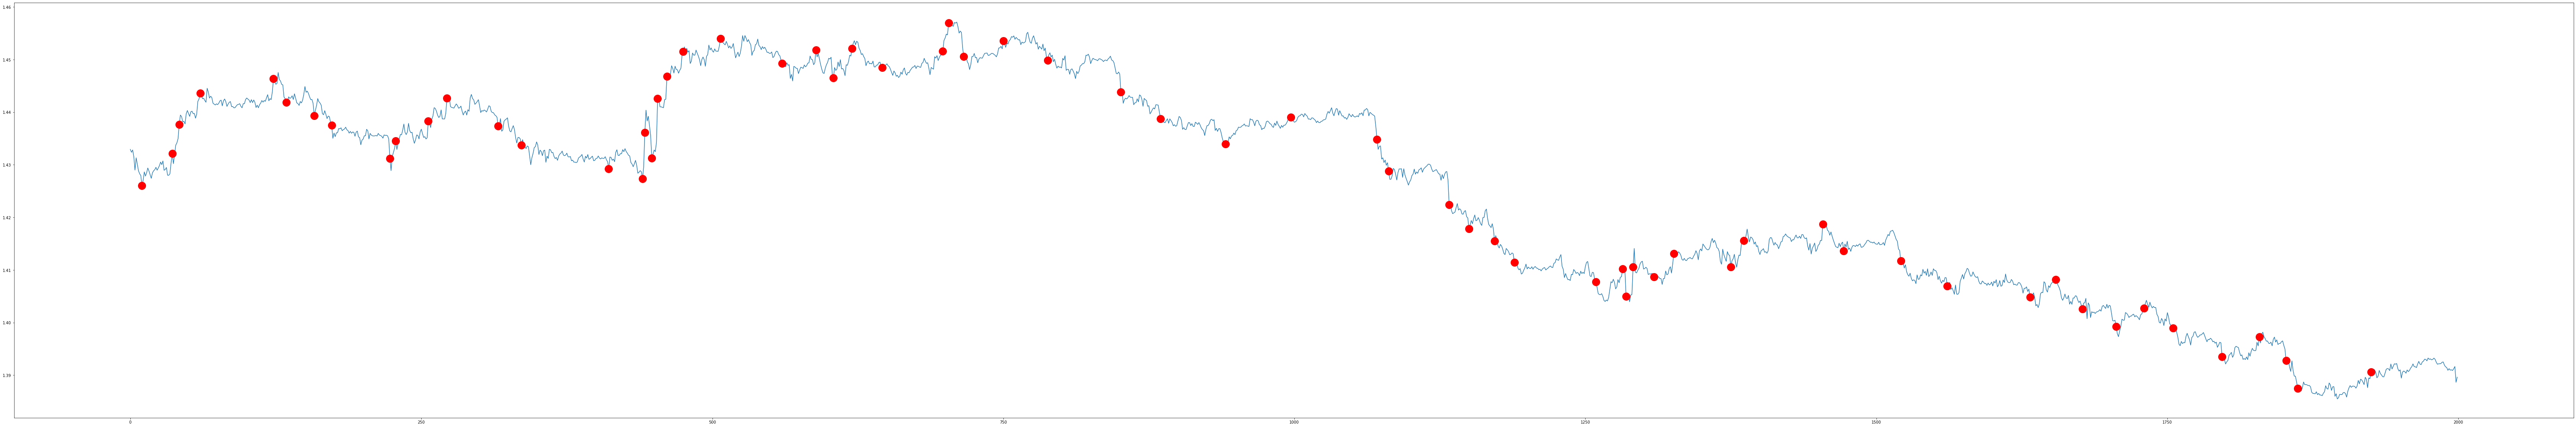

In [6]:
f = plt.figure()
f.set_figwidth(120)
f.set_figheight(20)
plt.plot(df_raw["Close"][0:2000])
plt.plot(df_raw.loc[events].loc[0:2000]["Close"],"ro", markersize=20)

In [7]:
sample = df_raw.loc[events]

In [8]:
sample=sample.set_index("Date")

In [9]:
def getDailyVol(close, span0=100):
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0 = df0[df0>0]
    df0 = pd.Series(close.index[df0-1], index=close.index[close.shape[0]-df0.shape[0]:])
    df0 = close.loc[df0.index] / close.loc[df0.values].values-1
    df0 = df0.ewm(span=span0).std()
    return df0

In [10]:
daily_vol = getDailyVol(sample.Close)

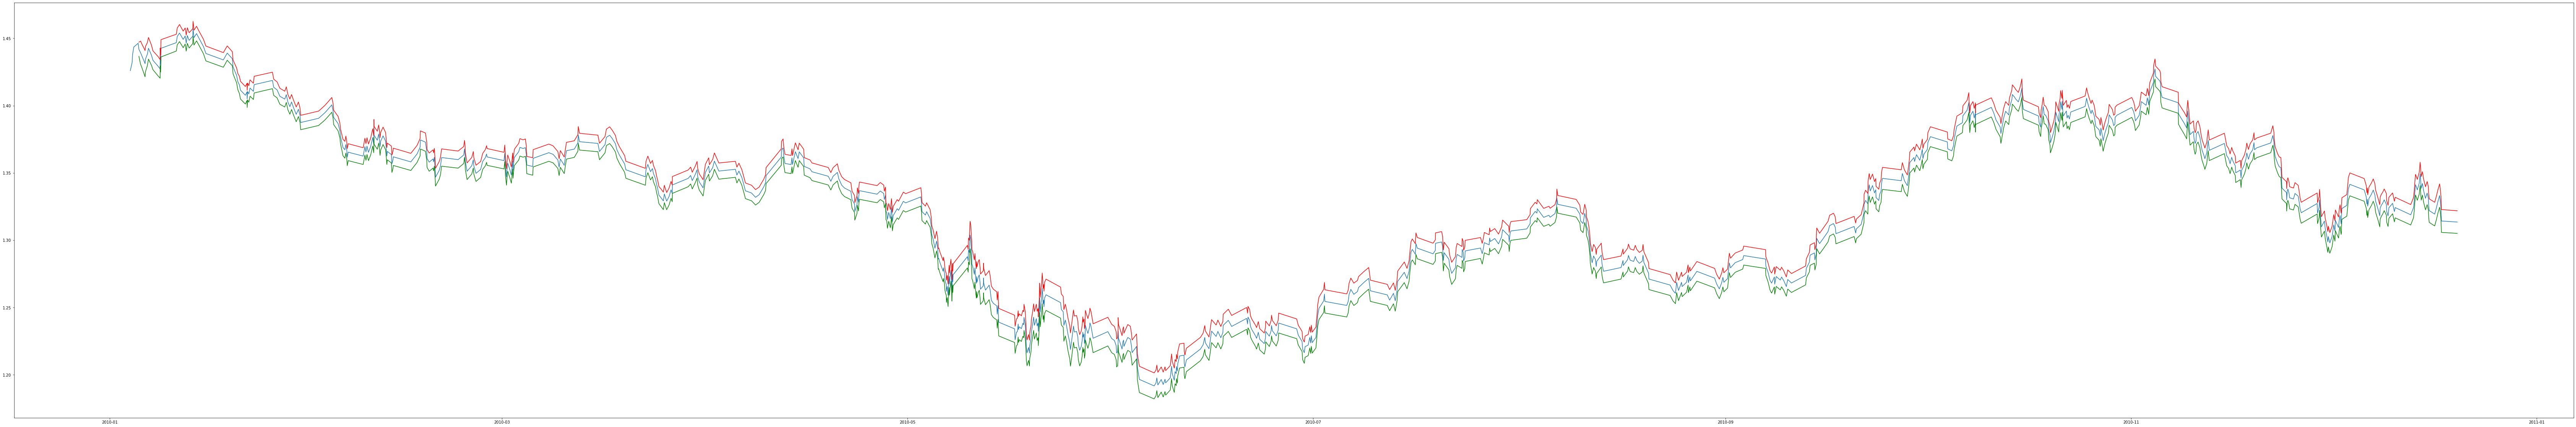

In [26]:
f = plt.figure()
f.set_figwidth(120)
f.set_figheight(20)
n = 1000
s = sample["Close"][:n]
plt.plot(s)
plt.plot(daily_vol[:n]+s,"r")
plt.plot(-daily_vol[:n]+s,"g")

In [27]:
daily_vol.mean(),

Date
2010-01-05 06:45:00         NaN
2010-01-05 09:30:00    0.005272
2010-01-05 15:30:00    0.008629
2010-01-05 19:15:00    0.008687
2010-01-06 07:45:00    0.009755
                         ...   
2019-12-18 15:00:00    0.004577
2019-12-20 13:30:00    0.004543
2019-12-27 05:00:00    0.004507
2019-12-27 17:15:00    0.004570
2019-12-30 18:00:00    0.004545
Name: Close, Length: 5617, dtype: float64